In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import base64
from PIL import Image
from io import BytesIO
import numpy as np
with open("images.jfif", "rb") as image_file:
    data = base64.b64encode(image_file.read())

im = Image.open(BytesIO(base64.b64decode(data)))

x = np.asarray(im)/255.
x = x.mean(-1)

In [6]:
from cola import ConvolveND
import matplotlib.pyplot as plt
import scipy as sp

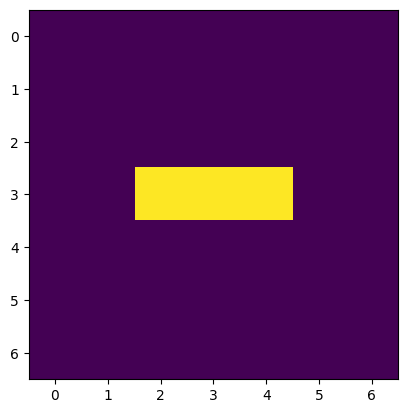

In [72]:
k=7
h = np.zeros((k,k))
h[k//2,k//2-k//4:k//2+k//4+1]=1
#h = sp.ndimage.rotate(h,30+180)
h/=h.sum()
plt.imshow(h)


In [65]:
A = ConvolveND(h,x.shape)

In [66]:
import jax.numpy as jnp
z = jnp.asarray(x.reshape(-1))

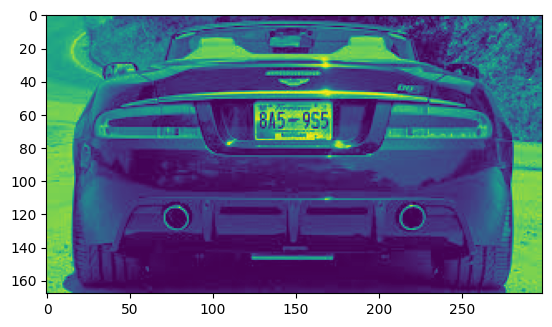

In [67]:
plt.imshow(z.reshape(x.shape))

In [68]:
A.shape

(50232, 50232)

In [69]:
import cola as lo

#plt.imshow((A@z).reshape(x.shape))

In [70]:
soln = lo.solve_symmetric(A+1e-4*lo.I_like(A),z)

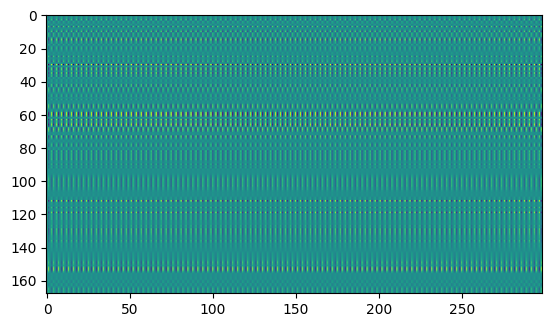

In [71]:
plt.imshow(soln.reshape(x.shape))

In [82]:
with open("car.jfif", "rb") as image_file:
    data = base64.b64encode(image_file.read())

im = Image.open(BytesIO(base64.b64decode(data)))

x = np.asarray(im)/255.
x = x.mean(-1)

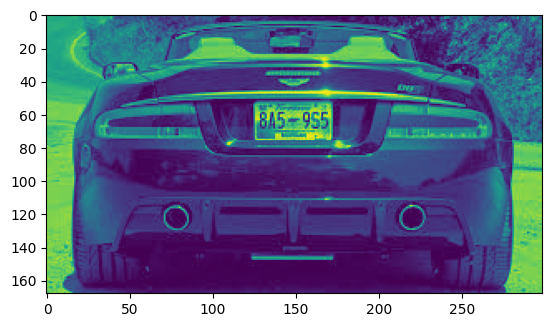

In [83]:
plt.imshow(x)

(9, 9)


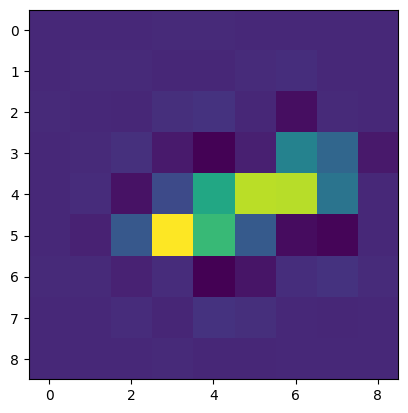

In [332]:
#h = np.array([[0,1,0],[1,4,1],[0,1,0]])
k=10
h = np.zeros((k,k))
h[k//2,k//2-k//4:k//2+k//4+1]=1
h = sp.ndimage.rotate(h,22)

h = sp.ndimage.gaussian_filter(h,sigma=.1)
h/=h.sum()
h = h[k//4:-k//4+1,k//4:-k//4+1]
print(h.shape)
plt.imshow(h)

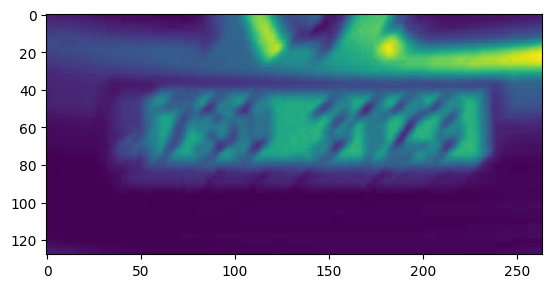

In [333]:
with open("images.jfif", "rb") as image_file:
    data = base64.b64encode(image_file.read())

im = Image.open(BytesIO(base64.b64decode(data)))

x = np.asarray(im)/255.
x = x.mean(-1)
x -= x.mean()
#x[:h.shape[0],:h.shape[1]]=h

plt.imshow(x)
#plt.colorbar()

In [334]:
# xx = sp.signal.convolve2d(x,x[::-1,::-1],mode='same',boundary='symm')
# xx[xx<1500]=0
# plt.imshow(xx)
# plt.colorbar()

In [335]:
xx.shape

(128, 264)

In [336]:
# plt.imshow(((A+.001*lo.I_like(A))@x.reshape(-1)).reshape(x.shape))

/data/users/marc_f/cola/cola/jax_fns.py:122: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  def array(arr, dtype=None):


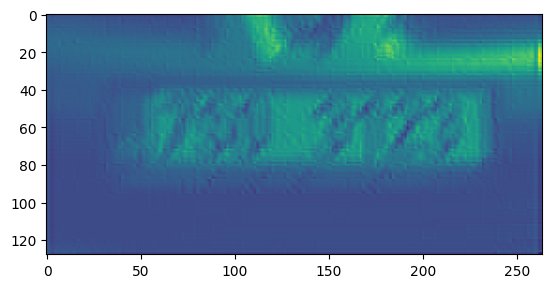

In [337]:
A = ConvolveND(h,x.shape)
B = A+A.T
plt.imshow(lo.solve_symmetric(B+.1*lo.I_like(B),x.reshape(-1),max_iters=3).reshape(x.shape))#,vmin=np.min(x),vmax=1.3*np.max(x))

(14, 14)


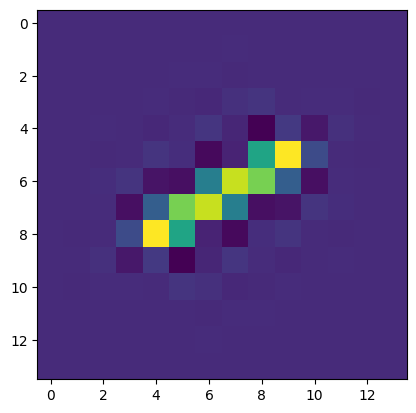

In [256]:
#h = np.array([[0,1,0],[1,4,1],[0,1,0]])
k=15
h = np.zeros((k,k))
h[k//2,k//2-k//4:k//2+k//4+1]=1
h = sp.ndimage.rotate(h,30)

h = sp.ndimage.gaussian_filter(h,sigma=.3)
h/=h.sum()
h = h[k//4:-k//4+1,k//4:-k//4+1]
print(h.shape)
plt.imshow(h)

(168, 299) (168, 299)
(168, 299) (168, 299)


/data/users/marc_f/cola/cola/jax_fns.py:115: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.zeros(shape=shape, dtype=dtype)


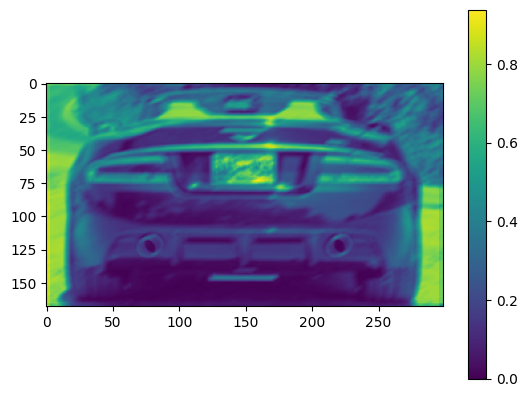

In [257]:
with open("car.jfif", "rb") as image_file:
    data = base64.b64encode(image_file.read())

im = Image.open(BytesIO(base64.b64decode(data)))

x = np.asarray(im)/255.
x = x.mean(-1)

A = ConvolveND(h,x.shape)
A = (A+A.T)/2.
y = A@x.reshape(-1)
plt.imshow((y).reshape(x.shape))
plt.colorbar()

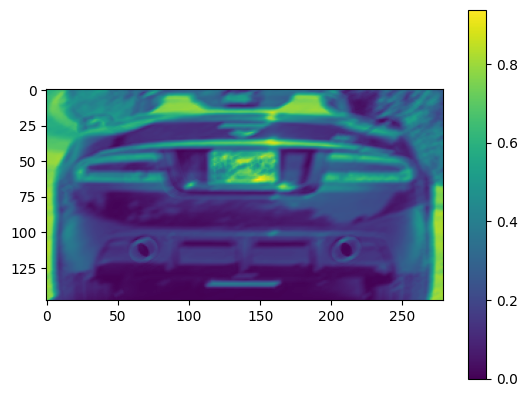

In [275]:
z = y.reshape(x.shape)
# z= z.at[:10].set(0)
# z= z.at[:,:10].set(0)
# z= z.at[-10:].set(0)
# z= z.at[:,-10:].set(0)
z = z[10:-10,10:-10]
plt.imshow(z)
plt.colorbar()
A = ConvolveND(h,z.shape)
A = A+A.T

B = ConvolveND(np.array([[0,1,0],[1,-4,1],[0,1,0.]]),z.shape)

In [276]:
print(A.shape,B.shape)

(41292, 41292) (41292, 41292)


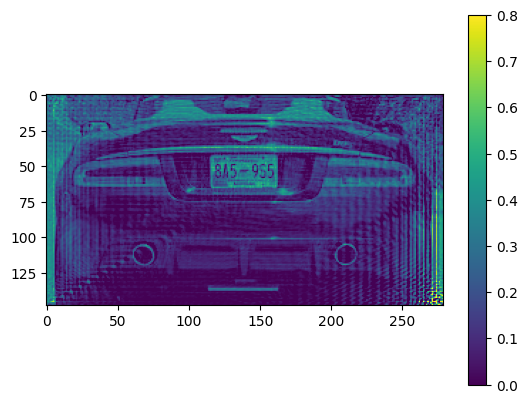

In [300]:
plt.imshow(lo.solve_symmetric(A+1e-2*lo.I_like(A),z.reshape(-1),max_iters=60).reshape(z.shape),vmax=.8,vmin=0)
plt.colorbar()
#1e-2*lo.I_like(A)